In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [85]:
pip install itables

In [86]:
import itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [87]:
data = pd.read_csv("/content/initial cleaned data.csv")

In [88]:
stacked_df = pd.DataFrame(data[["year","biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]])

# Grouping the stacked_df

A = stacked_df.groupby('year')[["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]].sum()

In [89]:
fig = px.bar(A,
             x=A.index,
             y=["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"],
             title="Increasing share of electricity generation by different methods across years",
             labels={"value": "Share of Electricity Generation", "variable": "Energy Source", "year": "Year"},
             barmode='stack'
            )

fig.show()

#### <span style="color:green"> Over the years, there has been a clear upward trend in electricity generation capacities, which may be attributed to the following factors: </span>

1. Adoption of technology from more developed countries.
2. Increased focus on renewable energy sources, leading to these sudden spikes.

<span style="color:green"> Additionally, the instances of sudden increases observed in the visualization could be due to inaccuracies in the data collection process. </span>

In [90]:
from plotly.subplots import make_subplots

# Assuming you have the 'B' DataFrame as described in your code

B = data.groupby('year')[['fossil_share_energy','renewables_share_energy','nuclear_share_energy']].mean().reset_index()
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])



# Assuming you have the 'B' DataFrame as described in your code

# Create subplots with one pie chart
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])

# Loop through each year from 1992 to 2022
for year in range(1992, 2023):
    # Filter data for the current year
    filtered_df = B[B['year'] == year]

    # Add a pie trace for the current year
    fig.add_trace(go.Pie(
                    labels=['Fossil', 'Renewable', 'Nuclear'],
                    values=[filtered_df['fossil_share_energy'].values[0],
                            filtered_df['renewables_share_energy'].values[0],
                            filtered_df['nuclear_share_energy'].values[0]],
                    textinfo='label+percent', hole=.3))

# Define slider steps for each year
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{'visible': [False] * len(fig.data)},
              {'title_text': f'{2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
        label=str(1992 + i)
    )
    step['args'][0]['visible'][i] = True
    steps.append(step)

# Make the first trace visible by default
fig.data[0].visible = True

# Update layout with title, slider, and formatting
fig.update_layout(
    title_text=f'Share of Electricity Generated',
    title_font_size=24,
    title_x=0.5,
    sliders=[dict(
        active=0,
        currentvalue={"prefix": "Year: "},
        pad={"t": 50},
        steps=steps
    )],
    height=500,
    width=1000,
    font=dict(family='Arial', size=12),
    margin=dict(t=80, l=50, r=50, b=50)
)

# Show the plot
fig.show()

#### <span style="color:green">An examination of the distribution over the years reveals a clear trend towards an increased focus and inclination for generating energy from renewable sources. </span>

In [91]:
def sparklines(ascending=False):
    # Assuming you have the 'data' DataFrame as described in your code

    # Select relevant columns
    D = data[['electricity_generation', 'electricity_demand', 'year', 'country', 'energy_per_capita', 'population']]

    # Group by country and calculate the mean population, select top/bottom 5
    A = data.groupby('country')['population'].mean().reset_index().sort_values(by='population', ascending=ascending).head()['country'].tolist()

    # Filter data based on conditions
    D = D[(D['electricity_demand'] != 0) & (D['country'].isin(A))]

    # Generate sparklines plot
    title = "Energy Per Capita of Top 5 countries population wise" if not ascending else "Energy Per Capita of Bottom 5 countries population wise"
    fig = px.line(D, x="year", y="energy_per_capita", facet_row="country", color='country', symbol="country",
                  facet_row_spacing=0.01, height=500, width=1000, title=title)

    # Adjust layout
    fig.update_yaxes(visible=True, fixedrange=True, nticks=2, showgrid=False, zeroline=False, title=None)
    fig.update_layout(annotations=[], overwrite=True, showlegend=True, plot_bgcolor="black", margin=dict(t=35, l=10, b=10, r=10))
    fig.show(config=dict(displayModeBar=False))

In [92]:
sparklines()

In [93]:
sparklines(True)

#### Upon observing the y-axis positioning of the sparklines, a two-fold difference in values is noted between the TOP-5 and BOTTOM-5. It can be concluded that countries with larger populations tend to have lower energy_per_capita, and conversely, countries with smaller populations exhibit higher energy_per_capita.</span>

In [94]:
E = data[data['year']>=2000].groupby(['year','country'])[['electricity_demand','electricity_generation']].mean().reset_index()
E['ratio'] = E['electricity_generation']/E['electricity_demand']

E['electricity_demand'] = E['electricity_demand'].mask(E.electricity_demand == 0, 1)
E['electricity_demand'] = np.log(E['electricity_demand'])
E['electricity_demand'] = E['electricity_demand'].mask((E.electricity_demand <= 0 | E.electricity_demand.isna()), 0)


E['electricity_generation'] = E['electricity_generation'].mask(E.electricity_generation == 0, 1)
E['electricity_generation'] = np.log(E['electricity_generation'])
E['electricity_demand'] = E['electricity_demand'].mask((E.electricity_generation <= 0 | E.electricity_generation.isna()), 0)

In [95]:
fig = px.scatter(E,x = 'electricity_demand', y = 'electricity_generation',
                 animation_frame = 'country',color = 'year',title = 'Correlation between Electricity Generation and Demand',size = abs(E.electricity_generation),
                 hover_name="country",  labels={'y':'Electricity Demand in terawatt-hours'},
                range_x=[-1,E.electricity_demand.max()], range_y=[-2,E.electricity_generation.max()])
fig.update_yaxes(visible=True, zeroline=False)

fig.update_layout(
        showlegend=True,
        plot_bgcolor="black",
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))

fig.show()

**The visualization suggests that the demand and supply of electricity have been steadily increasing over the years. Interestingly, in more developed nations such as the USA, Canada, UK, and France, there hasn't been a significant surge in demand or generation capacity, with values remaining relatively stable over several years.**

**This pattern is also observed in smaller European countries like Norway, the Netherlands, North Macedonia, Serbia, and Luxembourg.**

**In contrast, countries with emerging economies, including India, China, Argentina, and Israel, have exhibited a sharp upward trend.**

In [96]:
F = data[data.year >= 2000].groupby('year')[['greenhouse_gas_emissions','fossil_electricity']].mean().reset_index()

g1 = go.Bar(x=F.year, y=F.fossil_electricity, name = "Fossil Electricity",  marker_color='goldenrod')
# Create a line chart
g2 = go.Bar(x=F.year, y=F.greenhouse_gas_emissions, name = "greenhouse_gas_emissions",marker_color='burlywood')

fig = go.Figure(data=[g1,g2])

fig.update_layout(barmode='relative',title_text = "Electricity Generated by Fossils & Emissions of Greenhouse Gas",
        showlegend=True,
        plot_bgcolor="black",
                 height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))
fig.show()

 #### <span style="color:green"> Inspite of many measures and regulations, the greenhouse gas emissions has relatively grown over the past couple of decades which suggests there is a need for shifting focus on more renewable sources for energy generation.</span>

In [97]:
G = data.groupby(['year','country']).renewables_share_elec.mean().reset_index()

fig = px.line(G,x='year',y='renewables_share_elec',animation_frame='country', color_discrete_sequence=['gold'], markers=True,
        title = "Year on Year growth in Share of electricity generated by renewables")

fig.update_layout(

        plot_bgcolor="black",
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))

#### With continuous advancements and focus of International groups and countries to promote renewable sources as the primary sources of energy, many countries are continuously increasing their focus to renewable sources for the energy securities of their respective states.

**Seeing the previous chart that greenhouse gas emission still increasing inspite the fact that companies started to adapt more and more renewable sources for electricity generation.**

**Hopefully if the trend continuous, maybe in a couple of decades, we can minimize this greenhouse gas emissions caused by electricity generation.**

## Classifying countries based on their energy security and self-sufficiency

- Target label: A categorical label representing different levels of energy self-sufficiency (e.g., "High Self-Sufficiency," "Moderate Self-Sufficiency," "Low Self-Sufficiency").
- Rationale: This classification task could help identify countries that are heavily reliant on energy imports and potential areas for increasing domestic energy production or diversification.

# Data Preprocessing

In [98]:
data.net_elec_imports.loc[data.net_elec_imports == 0] = 1

In [99]:
data['energy_production_ratio'] = data.electricity_generation/data.net_elec_imports

In [100]:
data.energy_production_ratio.describe()

count     7362.000000
mean        20.557277
std        692.227233
min     -14206.454545
25%          0.000000
50%          0.000000
75%         14.610000
max      24327.000000
Name: energy_production_ratio, dtype: float64

<Axes: ylabel='energy_production_ratio'>

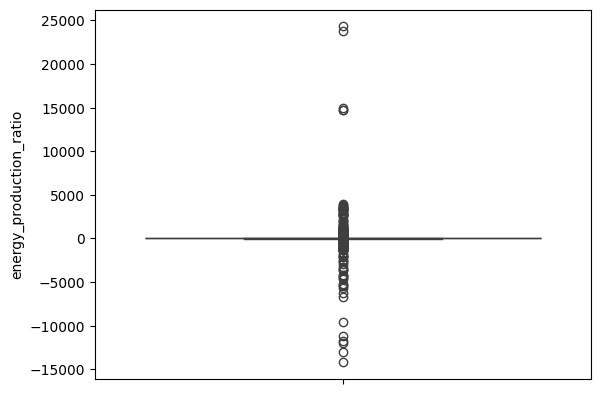

In [101]:
sns.boxplot(data['energy_production_ratio'])

### Creating a ratio that gives us an estimate of how much electricity is being generated divided by Net electricity imports .


#### Columns like net_elec_imports, energy_production_ratio, various types of energy production values, per_capita energy generation values can help in building a better model, hence we need to drop the rest of the columns and more closely observe features which are of greater significance for us.

In [102]:
ls = ['change_pct','change_twh','share_elec','cons_per_capita','prod_per_capita',
      'carbon_intensity_elec','energy_per_gdp','fossil_electricity','greenhouse_gas_emissions','other_renewable_exc_biofuel_electricity',
     'other_renewables_elec_per_capita_exc_biofuel','other_renewables_share_elec_exc_biofuel','iso_code',
     ]

unnec = []

# Loop through unique column names in the DataFrame
for i in data.columns.unique():
    # Check if the last 10 characters of the column name match any suffix in the list
    if i[-10:] in ls:
        unnec.append(i)
    # Check if the last 12 characters of the column name match any suffix in the list
    elif i[-12:] in ls:
        unnec.append(i)
    # Check if the last 15 characters of the column name match any suffix in the list, or the column name is directly in the list
    elif i[-15:] in ls or i in ls:
        unnec.append(i)

# Drop the columns identified as unnecessary
data1 = data.drop(unnec,axis = 1)

In [103]:
data1.head()

country  year  population           gdp  biofuel_consumption  \
0  Afghanistan  1974  11869881.0  1.430911e+10                  0.0   
1  Afghanistan  1975  12157390.0  1.517777e+10                  0.0   
2  Afghanistan  1976  12425276.0  1.602361e+10                  0.0   
3  Afghanistan  1977  12687308.0  1.520736e+10                  0.0   
4  Afghanistan  1978  12938864.0  1.633783e+10                  0.0   

   biofuel_elec_per_capita  biofuel_electricity  biofuel_share_energy  \
0                      0.0                  0.0                   0.0   
1                      0.0                  0.0                   0.0   
2                      0.0                  0.0                   0.0   
3                      0.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   

   coal_consumption  coal_elec_per_capita  ...  solar_electricity  \
0               0.0                   0.0  ...                0.0   
1               0.0                   0.0  ...                0.0   
2               0.0                   0.0  ...                0.0   
3               0.0                   0.0  ...                0.0   
4               0.0                   0.0  ...                0.0   

   solar_energy_per_capita  solar_share_energy  wind_consumption  \
0                      0.0                 0.0               0.0   
1                      0.0                 0.0               0.0   
2                      0.0                 0.0               0.0   
3                      0.0                 0.0               0.0   
4                      0.0                 0.0               0.0   

   wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
0                   0.0               0.0                     0.0   
1                   0.0               0.0                     0.0   
2                   0.0               0.0                     0.0   
3                   0.0               0.0                     0.0   
4                   0.0               0.0                     0.0   

   wind_share_energy  gdp_exp_moving_avg  energy_production_ratio  
0                0.0        1.430911e+10                      0.0  
1                0.0        1.478687e+10                      0.0  
2                0.0        1.528403e+10                      0.0  
3                0.0        1.525877e+10                      0.0  
4                0.0        1.556854e+10                      0.0  

[5 rows x 74 columns]

#### Columns like net_elec_imports, energy_production_ratio, various types of energy production values, per_capita energy generation values can help in building a better model, hence we need to drop the rest of the columns and more closely observe features which are of greater significance for us.

There are way too many zero's in the dataset but it is quite understandable because many countries do not have enough resources or inhouse facilities to generate energy, or produce different kind of sources that are key for energy generation or might they are not very economically strong to setup plants for energy generation or are less technically advanced.

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer

In [105]:
# Creating a list called 'scaling' of all the columns of object(not numbers) data type excluding the year column

data1.select_dtypes(exclude = 'object').columns.to_list()

scaling = [] + data1.select_dtypes(exclude = 'object').columns.to_list()[1:]

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler

# Pipeline object to demonstrate sequential processing

pipe = Pipeline([("minmaxscale",MinMaxScaler())])

# Column Transformers to apply a set of transformation to specifically mentioned columns parallely and concatenates the
# transformed outputs from different transformations into a single matrix.

Ct = ColumnTransformer([('pipe',pipe,scaling),  # Applying MinMaxScaler to columns in 'scaling'
                       ('ss',StandardScaler(),['year'])], # Applying StandardScaler to 'year' column
                       remainder = 'passthrough', verbose_feature_names_out= False) # Remaining columns will not be transformed

data1_transformed = Ct.fit_transform(data1)

In [107]:
# Extracting column names except the first two columns

cols = list(data1.columns.unique())[2:]

# Creating a DataFrame with transformed data

df1 = pd.DataFrame(data1_transformed,columns = cols + ['year','country'])

The Goal is to understand how the 'energy_production_ratio' column affects my target outcome. A higher value in this column shows how self-sufficient a country is in producing its own energy.

To do this, I will examine different percentile values of the 'energy_production_ratio' column. I want to find a threshold that helps me categorize countries based on their level of energy self-sufficiency. This way, I can better reflect the actual distribution of energy self-sufficiency among countries around the world.

In [108]:
# Printing percentiles for 'energy_production_ratio'

for i in range(1,101):
    print(f"energy_production_ratio at percentile {i} is {(np.percentile(df1['energy_production_ratio'],i)):.7f}")

energy_production_ratio at percentile 1 is 0.3526228
energy_production_ratio at percentile 2 is 0.3606714
energy_production_ratio at percentile 3 is 0.3645017
energy_production_ratio at percentile 4 is 0.3658675
energy_production_ratio at percentile 5 is 0.3667305
energy_production_ratio at percentile 6 is 0.3673047
energy_production_ratio at percentile 7 is 0.3676793
energy_production_ratio at percentile 8 is 0.3679448
energy_production_ratio at percentile 9 is 0.3681478
energy_production_ratio at percentile 10 is 0.3682846
energy_production_ratio at percentile 11 is 0.3683530
energy_production_ratio at percentile 12 is 0.3684244
energy_production_ratio at percentile 13 is 0.3684617
energy_production_ratio at percentile 14 is 0.3685078
energy_production_ratio at percentile 15 is 0.3685479
energy_production_ratio at percentile 16 is 0.3686380
energy_production_ratio at percentile 17 is 0.3686785
energy_production_ratio at percentile 18 is 0.3686785
energy_production_ratio at percentile

In [109]:
# Creating Target Column
# Assigning initial value 'Unknown' to the 'target' column

df1['target'] = 'Unknown'

# High Self-Sufficiency
mask = (df1['energy_production_ratio'] >= (np.percentile(df1['energy_production_ratio'],75)))
df1.loc[mask, 'target'] = 'High Self-Sufficiency'

# Moderate Self-Sufficiency
mask = df1['energy_production_ratio'].between(0.3686380,0.3690187)
df1.loc[mask, 'target'] = 'Moderate Self-Sufficiency'

# Low Self-Sufficiency
mask = df1['energy_production_ratio'] <= (np.percentile(df1['energy_production_ratio'],16))
df1.loc[mask, 'target'] = 'Low Self-Sufficiency'

In [110]:
# Filtering rows with 'target' as 'Unknown' and sorting by certain columns

df1[df1.target == 'Unknown'][['energy_production_ratio','target']].sort_values(['energy_production_ratio'],ascending = [False])

energy_production_ratio   target
5794                0.369057  Unknown
227                 0.369057  Unknown
79                  0.369057  Unknown
3926                0.369056  Unknown
5796                0.369055  Unknown
...                      ...      ...
237                 0.369022  Unknown
3268                0.369022  Unknown
6761                0.369021  Unknown
2892                0.369021  Unknown
5309                0.369019  Unknown

[72 rows x 2 columns]

In [111]:
# There are still many Unknowns, lets check the distribution
df1.target.value_counts()

target
Moderate Self-Sufficiency    4270
High Self-Sufficiency        1842
Low Self-Sufficiency         1178
Unknown                        72
Name: count, dtype: int64

In [112]:
df1['target'] = df1['target'].replace({"Low Self-Sufficiency":0,
                                       "Moderate Self-Sufficiency":1,
                                       "High Self-Sufficiency":2,
                                       "Unknown":3})
df1.target.value_counts()

target
1    4270
2    1842
0    1178
3      72
Name: count, dtype: int64

In [113]:
df1.head()

population       gdp biofuel_consumption biofuel_elec_per_capita  \
0   0.008279  0.000779                 0.0                     0.0   
1   0.008481  0.000827                 0.0                     0.0   
2   0.008669  0.000874                 0.0                     0.0   
3   0.008852  0.000829                 0.0                     0.0   
4   0.009029  0.000891                 0.0                     0.0   

  biofuel_electricity biofuel_share_energy coal_consumption  \
0                 0.0                  0.0              0.0   
1                 0.0                  0.0              0.0   
2                 0.0                  0.0              0.0   
3                 0.0                  0.0              0.0   
4                 0.0                  0.0              0.0   

  coal_elec_per_capita coal_electricity coal_production  ... wind_consumption  \
0                  0.0              0.0        0.000037  ...              0.0   
1                  0.0              0.0        0.000048  ...              0.0   
2                  0.0              0.0        0.000051  ...              0.0   
3                  0.0              0.0        0.000054  ...              0.0   
4                  0.0              0.0        0.000069  ...              0.0   

  wind_elec_per_capita wind_electricity wind_energy_per_capita  \
0                  0.0              0.0                    0.0   
1                  0.0              0.0                    0.0   
2                  0.0              0.0                    0.0   
3                  0.0              0.0                    0.0   
4                  0.0              0.0                    0.0   

  wind_share_energy gdp_exp_moving_avg energy_production_ratio      year  \
0               0.0           0.000845                0.368678 -1.869331   
1               0.0           0.000874                0.368678 -1.795267   
2               0.0           0.000904                0.368678 -1.721203   
3               0.0           0.000902                0.368678 -1.647139   
4               0.0           0.000921                0.368678 -1.573075   

       country target  
0  Afghanistan      1  
1  Afghanistan      1  
2  Afghanistan      1  
3  Afghanistan      1  
4  Afghanistan      1  

[5 rows x 75 columns]

In [114]:
# Since the model will only accept numeric values in label, So setting:
# Moderate Self-Sufficiency - > 2
# Low Self-Sufficiency - > 1
# High Self-Sufficiency -> 0
from sklearn.preprocessing import OrdinalEncoder

le = OrdinalEncoder()
df1['country'] = le.fit_transform(df1['country'].values.reshape(-1,1))

In [115]:
ohe = OneHotEncoder()

df1.country = ohe.fit_transform(np.array(df1.country).reshape(-1,1))

# Using StratifiedShuffleSplit to split the data based on the distribution of target label into train set and test set

In [116]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state = 42)
for train_index,test_index in split.split(np.zeros(len(data)),df1.target):
    train_set = df1.loc[train_index]
    test_set = df1.loc[test_index]

In [117]:
# Spliting train data into train data's features and labels

df1_train, df1_test =train_test_split(df1, test_size=0.25, random_state=25)

In [118]:
df1_train_x = train_set.iloc[:,:-1]
df1_train_y = train_set.iloc[:,-1]

df1_test_x = test_set.iloc[:,:-1]
df1_test_y = test_set.iloc[:,-1]

# Multiple Model Testing

In [119]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [121]:
# Function to get metrics
def get_metrics(y_test, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE': {round(MSE, 3)}, 'RMSE': {round(RMSE, 3)}, 'MAE': {round(MAE, 3)}, 'R2': {round(R2, 3)}]")

In [122]:
# Training Ridge and Lasso Regression
rir = Ridge().fit(df1_train_x, df1_train_y)
y_pred_rir = rir.predict(df1_test_x)

lar = Lasso().fit(df1_train_x, df1_train_y)
y_pred_lar = lar.predict(df1_test_x)

In [123]:
# Get metrics for each model

get_metrics(df1_test_y, y_pred_rir, "Ridge")
get_metrics(df1_test_y, y_pred_lar, "Lasso")

Ridge : ['MSE': 0.329, 'RMSE': 0.574, 'MAE': 0.402, 'R2': 0.247]
Lasso : ['MSE': 0.437, 'RMSE': 0.661, 'MAE': 0.481, 'R2': -0.0]


In [124]:
# Polynomial Regression
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(df1_train_x)
X_test_poly = poly.transform(df1_test_x)

poly_r = LinearRegression().fit(X_train_poly, df1_train_y)
y_pred_poly = poly_r.predict(X_test_poly)

In [125]:
get_metrics(df1_test_y, y_pred_poly, "PolynomialFeatures")

PolynomialFeatures : ['MSE': 2217774.856, 'RMSE': 1489.22, 'MAE': 45.159, 'R2': -5074374.433]


In [126]:
# Support Vector Regression
svr = SVR().fit(df1_train_x, df1_train_y)
y_pred_svr = svr.predict(df1_test_x)

In [127]:
get_metrics(df1_test_y, y_pred_svr, "SVR")

SVR : ['MSE': 0.434, 'RMSE': 0.659, 'MAE': 0.474, 'R2': 0.006]


In [128]:
# KNeighbors Regressor
knnr = KNeighborsRegressor().fit(df1_train_x, df1_train_y)
y_pred_knnr = knnr.predict(df1_test_x)

In [129]:
get_metrics(df1_test_y, y_pred_knnr, "KNeighborsRegressor")

KNeighborsRegressor : ['MSE': 0.167, 'RMSE': 0.409, 'MAE': 0.176, 'R2': 0.617]


In [130]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor().fit(df1_train_x, df1_train_y)
y_pred_dtr = dtr.predict(df1_test_x)

In [131]:
get_metrics(df1_test_y, y_pred_dtr, "DecisionTreeRegressor")

DecisionTreeRegressor : ['MSE': 0.003, 'RMSE': 0.052, 'MAE': 0.002, 'R2': 0.994]


In [132]:
# Random Forest Regressor
rfr = RandomForestRegressor().fit(df1_train_x, df1_train_y)
y_pred_rfr = rfr.predict(df1_test_x)

In [133]:
get_metrics(df1_test_y, y_pred_rfr, "RandomForestRegressor")

RandomForestRegressor : ['MSE': 0.001, 'RMSE': 0.035, 'MAE': 0.001, 'R2': 0.997]


In [135]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(df1_train_x, df1_train_y)
y_pred_gbr = gbr.predict(df1_test_x)
get_metrics(df1_test_y, y_pred_gbr, "GradientBoostingRegressor")

GradientBoostingRegressor : ['MSE': 0.003, 'RMSE': 0.052, 'MAE': 0.002, 'R2': 0.994]


In [136]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor().fit(df1_train_x, df1_train_y)
y_pred_abr = abr.predict(df1_test_x)
get_metrics(df1_test_y, y_pred_abr, "AdaBoostRegressor")

AdaBoostRegressor : ['MSE': 0.001, 'RMSE': 0.023, 'MAE': 0.001, 'R2': 0.999]


In [137]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor().fit(df1_train_x, df1_train_y)
y_pred_etr = etr.predict(df1_test_x)
get_metrics(df1_test_y, y_pred_etr, "ExtraTreesRegressor")

ExtraTreesRegressor : ['MSE': 0.02, 'RMSE': 0.141, 'MAE': 0.039, 'R2': 0.955]


In [140]:
# CatBoost Regressor
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(verbose=0).fit(df1_train_x, df1_train_y)
y_pred_cbr = cbr.predict(df1_test_x)
get_metrics(df1_test_y, y_pred_cbr, "CatBoostRegressor")

CatBoostRegressor : ['MSE': 0.003, 'RMSE': 0.058, 'MAE': 0.007, 'R2': 0.992]


In [141]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
en = ElasticNet().fit(df1_train_x, df1_train_y)
y_pred_en = en.predict(df1_test_x)
get_metrics(df1_test_y, y_pred_en, "ElasticNet")

ElasticNet : ['MSE': 0.437, 'RMSE': 0.661, 'MAE': 0.481, 'R2': -0.001]


In [142]:
# Huber Regressor
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor().fit(df1_train_x, df1_train_y)
y_pred_hr = hr.predict(df1_test_x)
get_metrics(df1_test_y, y_pred_hr, "HuberRegressor")

HuberRegressor : ['MSE': 0.395, 'RMSE': 0.629, 'MAE': 0.415, 'R2': 0.095]


# Best Model for this case: AdaBoost Regressor with 'R2': 0.999

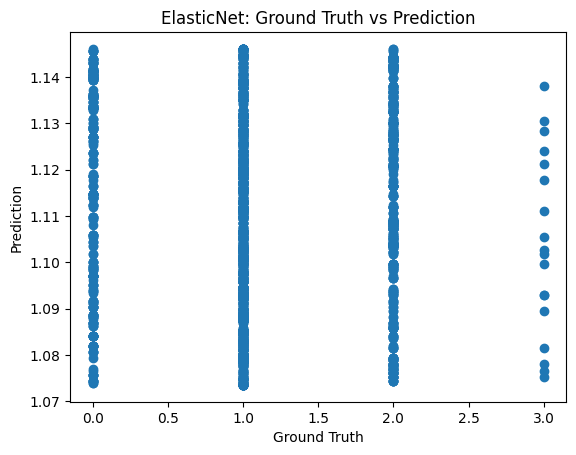

In [144]:
plt.scatter(df1_test_y, y_pred_en)
plt.title("ElasticNet: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

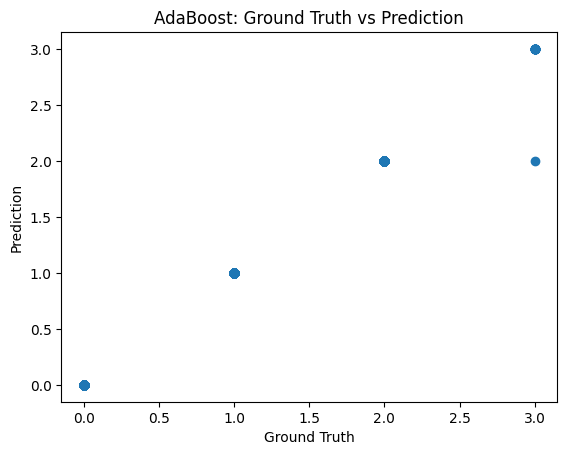

In [145]:
plt.scatter(df1_test_y, y_pred_abr)
plt.title("AdaBoost: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

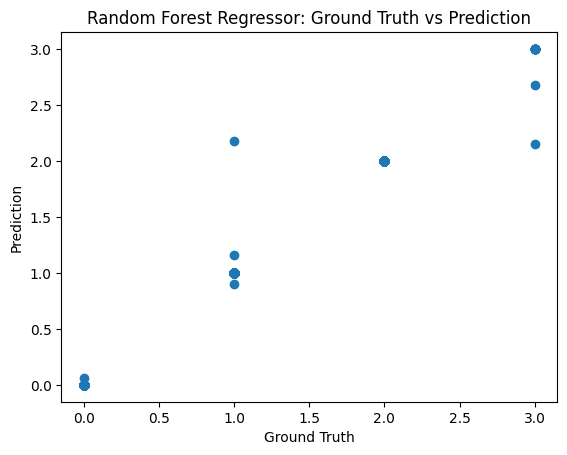

In [146]:
plt.scatter(df1_test_y, y_pred_rfr)
plt.title("Random Forest Regressor: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

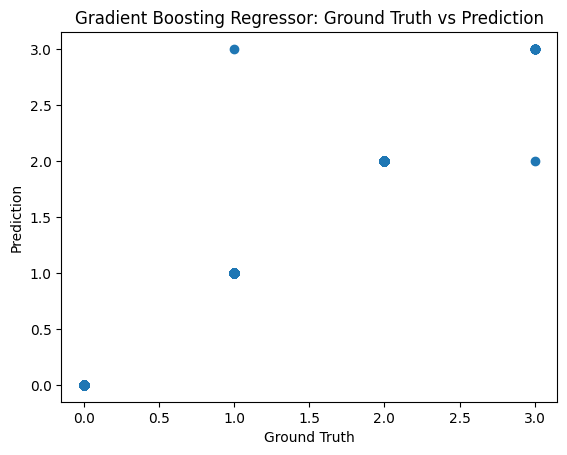

In [147]:
plt.scatter(df1_test_y, y_pred_gbr)
plt.title("Gradient Boosting Regressor: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

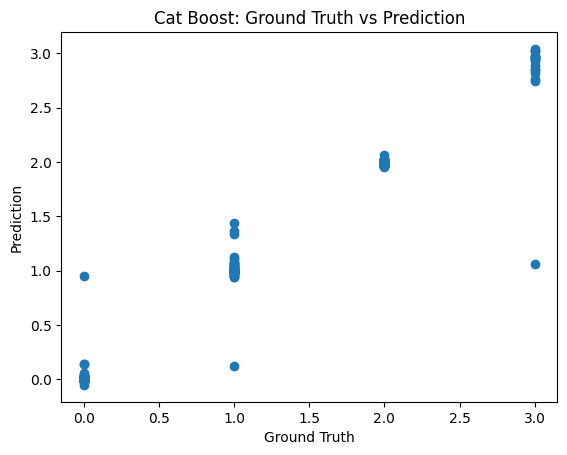

In [148]:
plt.scatter(df1_test_y, y_pred_cbr)
plt.title("Cat Boost: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()